In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from bs4 import BeautifulSoup
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import re


In [2]:
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()


[nltk_data] Downloading package inaugural to
[nltk_data]     /Users/vallirajasekar/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [3]:
inaugural.raw('1941-Roosevelt.txt')


'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [4]:
inaugural.raw('1961-Kennedy.txt')


'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [5]:
inaugural.raw('1973-Nixon.txt')


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [6]:
Rooseveltspeech_1="""

On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democracy, as a form of Government and a frame of life, is limited or measured by a kind of mystical and artificial fate that, for some unexplained reason, tyranny and slavery have become the surging wave of the future -- and that freedom is an ebbing tide.\n\nBut we Americans know that this is not true.\n\nEight years ago, when the life of this Republic seemed frozen by a fatalistic terror, we proved that this is not true. We were in the midst of shock -- but we acted. We acted quickly, boldly, decisively.\n\nThese later years have been living years -- fruitful years for the people of this democracy. For they have brought to us greater security and, I hope, a better understanding that life\'s ideals are to be measured in other than material things.\n\nMost vital to our present and our future is this experience of a democracy which successfully survived crisis at home; put away many evil things; built new structures on enduring lines; and, through it all, maintained the fact of its democracy.\n\nFor action has been taken within the three-way framework of the Constitution of the United States. The coordinate branches of the Government continue freely to function. The Bill of Rights remains inviolate. The freedom of elections is wholly maintained. Prophets of the downfall of American democracy have seen their dire predictions come to naught.\n\nDemocracy is not dying.\n\nWe know it because we have seen it revive--and grow.\n\nWe know it cannot die -- because it is built on the unhampered initiative of individual men and women joined together in a common enterprise -- an enterprise undertaken and carried through by the free expression of a free majority.\n\nWe know it because democracy alone, of all forms of government, enlists the full force of men\'s enlightened will.\n\nWe know it because democracy alone has constructed an unlimited civilization capable of infinite progress in the improvement of human life.\n\nWe know it because, if we look below the surface, we sense it still spreading on every continent -- for it is the most humane, the most advanced, and in the end the most unconquerable of all forms of human society.\n\nA nation, like a person, has a body--a body that must be fed and clothed and housed, invigorated and rested, in a manner that measures up to the objectives of our time.\n\nA nation, like a person, has a mind -- a mind that must be kept informed and alert, that must know itself, that understands the hopes and the needs of its neighbors -- all the other nations that live within the narrowing circle of the world.\n\nAnd a nation, like a person, has something deeper, something more permanent, something larger than the sum of all its parts. It is that something which matters most to its future -- which calls forth the most sacred guarding of its present.\n\nIt is a thing for which we find it difficult -- even impossible -- to hit upon a single, simple word.\n\nAnd yet we all understand what it is -- the spirit -- the faith of America. It is the product of centuries. It was born in the multitudes of those who came from many lands -- some of high degree, but mostly plain people, who sought here, early and late, to find freedom more freely.\n\nThe democratic aspiration is no mere recent phase in human history. It is human history. It permeated the ancient life of early peoples. It blazed anew in the middle ages. It was written in Magna Charta.\n\nIn the Americas its impact has been irresistible. America has been the New World in all tongues, to all peoples, not because this continent was a new-found land, but because all those who came here believed they could create upon this continent a new life -- a life that should be new in freedom.\n\nIts vitality was written into our own Mayflower Compact, into the Declaration of Independence, into the Constitution of the United States, into the Gettysburg Address.\n\nThose who first came here to carry out the longings of their spirit, and the millions who followed, and the stock that sprang from them -- all have moved forward constantly and consistently toward an ideal which in itself has gained stature and clarity with each generation.\n\nThe hopes of the Republic cannot forever tolerate either undeserved poverty or self-serving wealth.\n\nWe know that we still have far to go; that we must more greatly build the security and the opportunity and the knowledge of every citizen, in the measure justified by the resources and the capacity of the land.\n\nBut it is not enough to achieve these purposes alone. It is not enough to clothe and feed the body of this Nation, and instruct and inform its mind. For there is also the spirit. And of the three, the greatest is the spirit.\n\nWithout the body and the mind, as all men know, the Nation could not live.\n\nBut if the spirit of America were killed, even though the Nation\'s body and mind, constricted in an alien world, lived on, the America we know would have perished.\n\nThat spirit -- that faith -- speaks to us in our daily lives in ways often unnoticed, because they seem so obvious. It speaks to us here in the Capital of the Nation. It speaks to us through the processes of governing in the sovereignties of 48 States. It speaks to us in our counties, in our cities, in our towns, and in our villages. It speaks to us from the other nations of the hemisphere, and from those across the seas -- the enslaved, as well as the free. Sometimes we fail to hear or heed these voices of freedom because to us the privilege of our freedom is such an old, old story.\n\nThe destiny of America was proclaimed in words of prophecy spoken by our first President in his first inaugural in 1789 -- words almost directed, it would seem, to this year of 1941: "The preservation of the sacred fire of liberty and the destiny of the republican model of government are justly considered deeply, finally, staked on the experiment intrusted to the hands of the American people."\n\nIf we lose that sacred fire--if we let it be smothered with doubt and fear -- then we shall reject the destiny which Washington strove so valiantly and so triumphantly to establish. The preservation of the spirit and faith of the Nation does, and will, furnish the highest justification for every sacrifice that we may make in the cause of national defense.\n\nIn the face of great perils never before encountered, our strong purpose is to protect and to perpetuate the integrity of democracy.\n\nFor this we muster the spirit of America, and the faith of America.\n\nWe do not retreat. We are not content to stand still. As Americans, we go forward, in the service of our country, by the will of God.\n
"""

In [7]:
Rooseveltspeech_1

'\n\nOn each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that de

In [8]:
Kennedyspeech_1="""
Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new generation of Americans -- born in this century, tempered by war, disciplined by a hard and bitter peace, proud of our ancient heritage -- and unwilling to witness or permit the slow undoing of those human rights to which this Nation has always been committed, and to which we are committed today at home and around the world.\n\nLet every nation know, whether it wishes us well or ill, that we shall pay any price, bear any burden, meet any hardship, support any friend, oppose any foe, in order to assure the survival and the success of liberty.\n\nThis much we pledge -- and more.\n\nTo those old allies whose cultural and spiritual origins we share, we pledge the loyalty of faithful friends. United, there is little we cannot do in a host of cooperative ventures. Divided, there is little we can do -- for we dare not meet a powerful challenge at odds and split asunder.\n\nTo those new States whom we welcome to the ranks of the free, we pledge our word that one form of colonial control shall not have passed away merely to be replaced by a far more iron tyranny. We shall not always expect to find them supporting our view. But we shall always hope to find them strongly supporting their own freedom -- and to remember that, in the past, those who foolishly sought power by riding the back of the tiger ended up inside.\n\nTo those peoples in the huts and villages across the globe struggling to break the bonds of mass misery, we pledge our best efforts to help them help themselves, for whatever period is required -- not because the Communists may be doing it, not because we seek their votes, but because it is right. If a free society cannot help the many who are poor, it cannot save the few who are rich.\n\nTo our sister republics south of our border, we offer a special pledge -- to convert our good words into good deeds -- in a new alliance for progress -- to assist free men and free governments in casting off the chains of poverty. But this peaceful revolution of hope cannot become the prey of hostile powers. Let all our neighbors know that we shall join with them to oppose aggression or subversion anywhere in the Americas. And let every other power know that this Hemisphere intends to remain the master of its own house.\n\nTo that world assembly of sovereign states, the United Nations, our last best hope in an age where the instruments of war have far outpaced the instruments of peace, we renew our pledge of support--to prevent it from becoming merely a forum for invective -- to strengthen its shield of the new and the weak -- and to enlarge the area in which its writ may run.\n\nFinally, to those nations who would make themselves our adversary, we offer not a pledge but a request: that both sides begin anew the quest for peace, before the dark powers of destruction unleashed by science engulf all humanity in planned or accidental self-destruction.\n\nWe dare not tempt them with weakness. For only when our arms are sufficient beyond doubt can we be certain beyond doubt that they will never be employed.\n\nBut neither can two great and powerful groups of nations take comfort from our present course -- both sides overburdened by the cost of modern weapons, both rightly alarmed by the steady spread of the deadly atom, yet both racing to alter that uncertain balance of terror that stays the hand of mankind\'s final war.\n\nSo let us begin anew -- remembering on both sides that civility is not a sign of weakness, and sincerity is always subject to proof. Let us never negotiate out of fear. But let us never fear to negotiate.\n\nLet both sides explore what problems unite us instead of belaboring those problems which divide us.\n\nLet both sides, for the first time, formulate serious and precise proposals for the inspection and control of arms -- and bring the absolute power to destroy other nations under the absolute control of all nations.\n\nLet both sides seek to invoke the wonders of science instead of its terrors. Together let us explore the stars, conquer the deserts, eradicate disease, tap the ocean depths, and encourage the arts and commerce.\n\nLet both sides unite to heed in all corners of the earth the command of Isaiah -- to "undo the heavy burdens ... and to let the oppressed go free."\n\nAnd if a beachhead of cooperation may push back the jungle of suspicion, let both sides join in creating a new endeavor, not a new balance of power, but a new world of law, where the strong are just and the weak secure and the peace preserved.\n\nAll this will not be finished in the first 100 days. Nor will it be finished in the first 1,000 days, nor in the life of this Administration, nor even perhaps in our lifetime on this planet. But let us begin.\n\nIn your hands, my fellow citizens, more than in mine, will rest the final success or failure of our course. Since this country was founded, each generation of Americans has been summoned to give testimony to its national loyalty. The graves of young Americans who answered the call to service surround the globe.\n\nNow the trumpet summons us again -- not as a call to bear arms, though arms we need; not as a call to battle, though embattled we are -- but a call to bear the burden of a long twilight struggle, year in and year out, "rejoicing in hope, patient in tribulation" -- a struggle against the common enemies of man: tyranny, poverty, disease, and war itself.\n\nCan we forge against these enemies a grand and global alliance, North and South, East and West, that can assure a more fruitful life for all mankind? Will you join in that historic effort?\n\nIn the long history of the world, only a few generations have been granted the role of defending freedom in its hour of maximum danger. I do not shrink from this responsibility -- I welcome it. I do not believe that any of us would exchange places with any other people or any other generation. The energy, the faith, the devotion which we bring to this endeavor will light our country and all who serve it -- and the glow from that fire can truly light the world.\n\nAnd so, my fellow Americans: ask not what your country can do for you -- ask what you can do for your country.\n\nMy fellow citizens of the world: ask not what America will do for you, but what together we can do for the freedom of man.\n\nFinally, whether you are citizens of America or citizens of the world, ask of us the same high standards of strength and sacrifice which we ask of you. With a good conscience our only sure reward, with history the final judge of our deeds, let us go forth to lead the land we love, asking His blessing and His help, but knowing that here on earth God\'s work must truly be our own.\n"""

In [9]:
Kennedyspeech_1

'\nVice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gen

In [10]:
inaugural.raw('1973-Nixon.txt')


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [11]:
nixonspeech_1="""
Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional friendships, and by our missions to Peking and to Moscow, we were able to establish the base for a new and more durable pattern of relationships among the nations of the world. Because of America\'s bold initiatives, 1972 will be long remembered as the year of the greatest progress since the end of World War II toward a lasting peace in the world.\n\nThe peace we seek in the world is not the flimsy peace which is merely an interlude between wars, but a peace which can endure for generations to come.\n\nIt is important that we understand both the necessity and the limitations of America\'s role in maintaining that peace.\n\nUnless we in America work to preserve the peace, there will be no peace.\n\nUnless we in America work to preserve freedom, there will be no freedom.\n\nBut let us clearly understand the new nature of America\'s role, as a result of the new policies we have adopted over these past four years.\n\nWe shall respect our treaty commitments.\n\nWe shall support vigorously the principle that no country has the right to impose its will or rule on another by force.\n\nWe shall continue, in this era of negotiation, to work for the limitation of nuclear arms, and to reduce the danger of confrontation between the great powers.\n\nWe shall do our share in defending peace and freedom in the world. But we shall expect others to do their share.\n\nThe time has passed when America will make every other nation\'s conflict our own, or make every other nation\'s future our responsibility, or presume to tell the people of other nations how to manage their own affairs.\n\nJust as we respect the right of each nation to determine its own future, we also recognize the responsibility of each nation to secure its own future.\n\nJust as America\'s role is indispensable in preserving the world\'s peace, so is each nation\'s role indispensable in preserving its own peace.\n\nTogether with the rest of the world, let us resolve to move forward from the beginnings we have made. Let us continue to bring down the walls of hostility which have divided the world for too long, and to build in their place bridges of understanding -- so that despite profound differences between systems of government, the people of the world can be friends.\n\nLet us build a structure of peace in the world in which the weak are as safe as the strong -- in which each respects the right of the other to live by a different system -- in which those who would influence others will do so by the strength of their ideas, and not by the force of their arms.\n\nLet us accept that high responsibility not as a burden, but gladly -- gladly because the chance to build such a peace is the noblest endeavor in which a nation can engage; gladly, also, because only if we act greatly in meeting our responsibilities abroad will we remain a great Nation, and only if we remain a great Nation will we act greatly in meeting our challenges at home.\n\nWe have the chance today to do more than ever before in our history to make life better in America -- to ensure better education, better health, better housing, better transportation, a cleaner environment -- to restore respect for law, to make our communities more livable -- and to insure the God-given right of every American to full and equal opportunity.\n\nBecause the range of our needs is so great -- because the reach of our opportunities is so great -- let us be bold in our determination to meet those needs in new ways.\n\nJust as building a structure of peace abroad has required turning away from old policies that failed, so building a new era of progress at home requires turning away from old policies that have failed.\n\nAbroad, the shift from old policies to new has not been a retreat from our responsibilities, but a better way to peace.\n\nAnd at home, the shift from old policies to new will not be a retreat from our responsibilities, but a better way to progress.\n\nAbroad and at home, the key to those new responsibilities lies in the placing and the division of responsibility. We have lived too long with the consequences of attempting to gather all power and responsibility in Washington.\n\nAbroad and at home, the time has come to turn away from the condescending policies of paternalism -- of "Washington knows best."\n\nA person can be expected to act responsibly only if he has responsibility. This is human nature. So let us encourage individuals at home and nations abroad to do more for themselves, to decide more for themselves. Let us locate responsibility in more places. Let us measure what we will do for others by what they will do for themselves.\n\nThat is why today I offer no promise of a purely governmental solution for every problem. We have lived too long with that false promise. In trusting too much in government, we have asked of it more than it can deliver. This leads only to inflated expectations, to reduced individual effort, and to a disappointment and frustration that erode confidence both in what government can do and in what people can do.\n\nGovernment must learn to take less from people so that people an do more for themselves.\n\nLet us remember that America was built not by government, but by people -- not by welfare, but by work -- not by shirking responsibility, but by seeking responsibility.\n\nIn our own lives, let each of us ask -- not just what will government do for me, but what can I do for myself?\n\nIn the challenges we face together, let each of us ask -- not just how can government help, but how can I help?\n\nYour National Government has a great and vital role to play. And I pledge to you that where this Government should act, we will act boldly and we will lead boldly. But just as important is the role that each and every one of us must play, as an individual and as a member of his own community.\n\nFrom this day forward, let each of us make a solemn commitment in his own heart: to bear his responsibility, to do his part, to live his ideals -- so that together, we can see the dawn of a new age of progress for America, and together, as we celebrate our 200th anniversary as a nation, we can do so proud in the fulfillment of our promise to ourselves and to the world.\n\nAs America\'s longest and most difficult war comes to an end, let us again learn to debate our differences with civility and decency. And let each of us reach out for that one precious quality government cannot provide -- a new level of respect for the rights and feelings of one another, a new level of respect for the individual human dignity which is the cherished birthright of every American.\n\nAbove all else, the time has come for us to renew our faith in ourselves and in America.\n\nIn recent years, that faith has been challenged.\n\nOur children have been taught to be ashamed of their country, ashamed of their parents, ashamed of America\'s record at home and of its role in the world.\n\nAt every turn, we have been beset by those who find everything wrong with America and little that is right. But I am confident that this will not be the judgment of history on these remarkable times in which we are privileged to live.\n\nAmerica\'s record in this century has been unparalleled in the world\'s history for its responsibility, for its generosity, for its creativity and for its progress.\n\nLet us be proud that our system has produced and provided more freedom and more abundance, more widely shared, than any other system in the history of the world.\n\nLet us be proud that in each of the four wars in which we have been engaged in this century, including the one we are now bringing to an end, we have fought not for our selfish advantage, but to help others resist aggression.\n\nLet us be proud that by our bold, new initiatives, and by our steadfastness for peace with honor, we have made a break-through toward creating in the world what the world has not known before -- a structure of peace that can last, not merely for our time, but for generations to come.\n\nWe are embarking here today on an era that presents challenges great as those any nation, or any generation, has ever faced.\n\nWe shall answer to God, to history, and to our conscience for the way in which we use these years.\n\nAs I stand in this place, so hallowed by history, I think of others who have stood here before me. I think of the dreams they had for America, and I think of how each recognized that he needed help far beyond himself in order to make those dreams come true.\n\nToday, I ask your prayers that in the years ahead I may have God\'s help in making decisions that are right for America, and I pray for your help so that together we may be worthy of our challenge.\n\nLet us pledge together to make these next four years the best four years in America\'s history, so that on its 200th birthday America will be as young and as vital as when it began, and as bright a beacon of hope for all the world.\n\nLet us go forward from here confident in hope, strong in our faith in one another, sustained by our faith in God who created us, and striving always to serve His purpose.\n"""

In [12]:
nixonspeech_1

'\nMr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our tradition

In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vallirajasekar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
Rooseveltspeechsentences_1=nltk.sent_tokenize(Rooseveltspeech_1)

In [15]:
Rooseveltspeechsentences_1

['\n\nOn each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.',
 "In Washington's day the task of the people was to create and weld together a nation.",
 "In Lincoln's day the task of the people was to preserve that Nation from disruption from within.",
 'In this day the task of the people is to save that Nation and its institutions from disruption from without.',
 'To us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be.',
 'If we do not, we risk the real peril of inaction.',
 'Lives of nations are determined not by the count of years, but by the lifetime of the human spirit.',
 'The life of a man is three-score years and ten: a little more, a little less.',
 'The life of a nation is the fullness of the measure of its will to live.',
 'There are men who doubt this.',
 'There are me

In [16]:
Kennedyspeechsentences_1=nltk.sent_tokenize(Kennedyspeech_1)

In [17]:
Kennedyspeechsentences_1

['\nVice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change.',
 'For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.',
 'The world is very different now.',
 'For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life.',
 'And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.',
 'We dare not forget today that we are the heirs of that first revolution.',
 'Let the word go forth from this time and place, to friend and foe alike, that the torch has been 

In [18]:
nixonspeechsentences_1=nltk.sent_tokenize(nixonspeech_1)

In [19]:
nixonspeechsentences_1

['\nMr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.',
 'As we meet here today, we stand on the threshold of a new era of peace in the world.',
 'The central question before us is: How shall we use that peace?',
 'Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.',
 'Let us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.',
 'This past year saw far-reaching results from our new policies for peace.',
 'By continuing to revitalize 

1)Find the number of characters, words, and sentences for the mentioned documents

# Roosevelt Speech 

# Character

In [20]:
len(Rooseveltspeech_1)

7574

# Words

In [21]:
len(Rooseveltspeech_1.split())

1360

# Sentences

In [22]:
len(Rooseveltspeechsentences_1)

68

# Kennedy Speech

# Character

In [23]:
len(Kennedyspeech_1)

7619

# Words

In [24]:
len(Kennedyspeech_1.split())

1390

# Sentences

In [25]:
len(Kennedyspeechsentences_1)

52

# Nixon Speech

# Character

In [26]:
len(nixonspeech_1)

9992

# Words

In [27]:
len(nixonspeech_1.split())

1819

# Sentences

In [28]:
len(nixonspeechsentences_1)

68

Remove all the stopwords from all three speeches

In [29]:
corpus_rooseveltspeech=[]
for i in range(len(Rooseveltspeechsentences_1)):
    review=re.sub('[^a-zA-Z]',' ',Rooseveltspeechsentences_1[i])
    review=review.lower()                 
    corpus_rooseveltspeech.append(review)             

In [30]:
len(corpus_rooseveltspeech)

68

In [87]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
stemmer=PorterStemmer()

In [33]:
lemmatizer=WordNetLemmatizer()

In [34]:
for i in corpus_rooseveltspeech:
    rooseveltspeech_clean=nltk.word_tokenize(i)
    for rooseveltspeech_clean in rooseveltspeech_clean:
        if rooseveltspeech_clean not in set(stopwords.words('english')):
            print(lemmatizer.lemmatize(rooseveltspeech_clean))

national
day
inauguration
since
people
renewed
sense
dedication
united
state
washington
day
task
people
create
weld
together
nation
lincoln
day
task
people
preserve
nation
disruption
within
day
task
people
save
nation
institution
disruption
without
u
come
time
midst
swift
happening
pause
moment
take
stock
recall
place
history
rediscover
may
risk
real
peril
inaction
life
nation
determined
count
year
lifetime
human
spirit
life
man
three
score
year
ten
little
little
le
life
nation
fullness
measure
live
men
doubt
men
believe
democracy
form
government
frame
life
limited
measured
kind
mystical
artificial
fate
unexplained
reason
tyranny
slavery
become
surging
wave
future
freedom
ebbing
tide
american
know
true
eight
year
ago
life
republic
seemed
frozen
fatalistic
terror
proved
true
midst
shock
acted
acted
quickly
boldly
decisively
later
year
living
year
fruitful
year
people
democracy
brought
u
greater
security
hope
better
understanding
life
ideal
measured
material
thing
vital
present
future
ex

In [35]:
lemmatizer.lemmatize(rooseveltspeech_clean)

'god'

In [36]:
corpus_Kennedyspeech=[]
for i in range(len(Kennedyspeechsentences_1)):
    review=re.sub('[^a-zA-Z]',' ',Kennedyspeechsentences_1[i])
    review=review.lower()                 
    corpus_Kennedyspeech.append(review)             

In [37]:
len(corpus_Kennedyspeech)

52

In [38]:
for i in corpus_Kennedyspeech:
    Kennedyspeech_clean=nltk.word_tokenize(i)
    for Kennedyspeech_clean in Kennedyspeech_clean:
        if Kennedyspeech_clean not in set(stopwords.words('english')):
            print(stemmer.stem(Kennedyspeech_clean))

vice
presid
johnson
mr
speaker
mr
chief
justic
presid
eisenhow
vice
presid
nixon
presid
truman
reverend
clergi
fellow
citizen
observ
today
victori
parti
celebr
freedom
symbol
end
well
begin
signifi
renew
well
chang
sworn
almighti
god
solemn
oath
forebear
l
prescrib
nearli
centuri
three
quarter
ago
world
differ
man
hold
mortal
hand
power
abolish
form
human
poverti
form
human
life
yet
revolutionari
belief
forebear
fought
still
issu
around
globe
belief
right
man
come
generos
state
hand
god
dare
forget
today
heir
first
revolut
let
word
go
forth
time
place
friend
foe
alik
torch
pass
new
gener
american
born
centuri
temper
war
disciplin
hard
bitter
peac
proud
ancient
heritag
unwil
wit
permit
slow
undo
human
right
nation
alway
commit
commit
today
home
around
world
let
everi
nation
know
whether
wish
us
well
ill
shall
pay
price
bear
burden
meet
hardship
support
friend
oppos
foe
order
assur
surviv
success
liberti
much
pledg
old
alli
whose
cultur
spiritu
origin
share
pledg
loyalti
faith
friend
uni

In [39]:
corpus_Nixonspeech=[]
for i in range(len(nixonspeechsentences_1)):
    review=re.sub('[^a-zA-Z]',' ',nixonspeechsentences_1[i])
    review=review.lower()                 
    corpus_Nixonspeech.append(review)             

In [40]:
len(corpus_Nixonspeech)

68

In [41]:
for i in corpus_Nixonspeech:
    Nixonspeech_clean=nltk.word_tokenize(i)
    for Nixonspeech_clean in Nixonspeech_clean:
        if Nixonspeech_clean not in set(stopwords.words('english')):
            print(stemmer.stem(Nixonspeech_clean))

mr
vice
presid
mr
speaker
mr
chief
justic
senat
cook
mr
eisenhow
fellow
citizen
great
good
countri
share
togeth
met
four
year
ago
america
bleak
spirit
depress
prospect
seemingli
endless
war
abroad
destruct
conflict
home
meet
today
stand
threshold
new
era
peac
world
central
question
us
shall
use
peac
let
us
resolv
era
enter
postwar
period
often
time
retreat
isol
lead
stagnat
home
invit
new
danger
abroad
let
us
resolv
becom
time
great
respons
greatli
born
renew
spirit
promis
america
enter
third
centuri
nation
past
year
saw
far
reach
result
new
polici
peac
continu
revit
tradit
friendship
mission
peke
moscow
abl
establish
base
new
durabl
pattern
relationship
among
nation
world
america
bold
initi
long
rememb
year
greatest
progress
sinc
end
world
war
ii
toward
last
peac
world
peac
seek
world
flimsi
peac
mere
interlud
war
peac
endur
gener
come
import
understand
necess
limit
america
role
maintain
peac
unless
america
work
preserv
peac
peac
unless
america
work
preserv
freedom
freedom
let
us
clea

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

In [71]:
cv=CountVectorizer()

In [72]:
X=cv.fit_transform(corpus_rooseveltspeech).toarray()

In [93]:
corpus_rooseveltspeech[45]

'first came carri long spirit million follow stock sprang move forward constantli consist toward ideal gain statur clariti gener'

corpus_rooseveltspeech


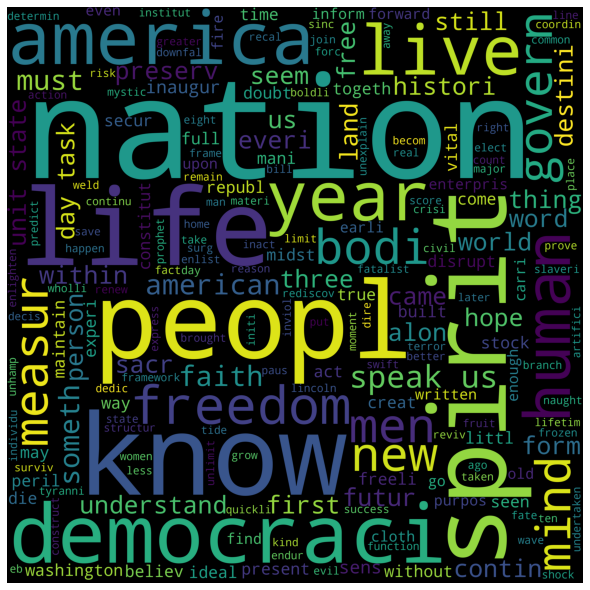

In [101]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("corpus_rooseveltspeech")
plt.show()


In [100]:
wc_a = ' '.join(corpus_rooseveltspeech)

In [98]:
from wordcloud import WordCloud


In [97]:
!pip install wordcloud


     |████████████████████████████████| 160 kB 1.6 MB/s eta 0:00:01


In [105]:
wc_b = ' '.join(corpus_Kennedyspeech)

corpus_Kennedyspeech


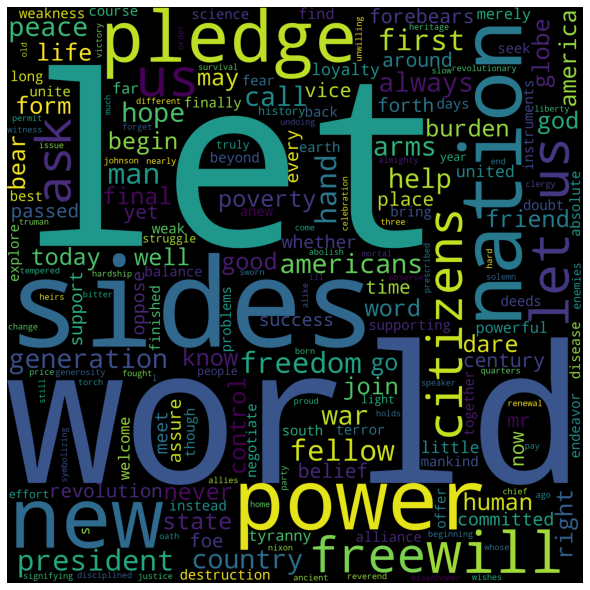

In [106]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_b) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("corpus_Kennedyspeech")
plt.show()


In [108]:
wc_c = ' '.join(corpus_Nixonspeech)

corpus_Nixonspeech


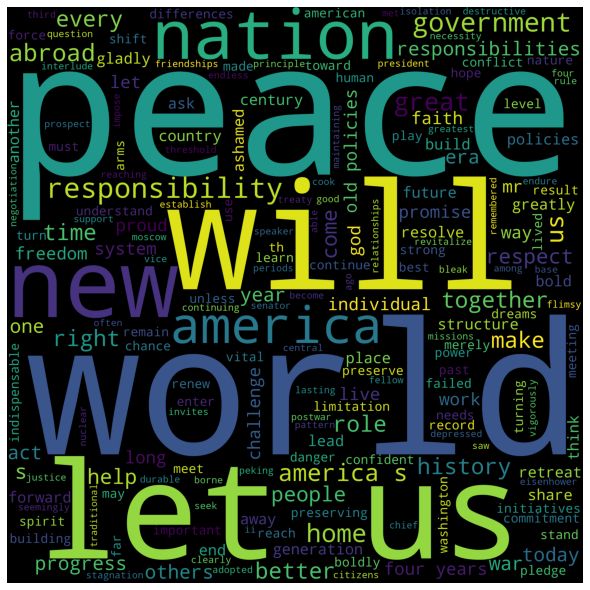

In [109]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_c) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("corpus_Nixonspeech")
plt.show()


In [110]:
all_words_freq=nltk.FreqDist(corpus_Nixonspeech)
all_words_freq

FreqDist({' mr  vice president  mr  speaker  mr  chief justice  senator cook  mrs  eisenhower  and my fellow citizens of this great and good country we share together   when we met here four years ago  america was bleak in spirit  depressed by the prospect of seemingly endless war abroad and of destructive conflict at home ': 1, 'as we meet here today  we stand on the threshold of a new era of peace in the world ': 1, 'the central question before us is  how shall we use that peace ': 1, 'let us resolve that this era we are about to enter will not be what other postwar periods have so often been  a time of retreat and isolation that leads to stagnation at home and invites new danger abroad ': 1, 'let us resolve that this will be what it can become  a time of great responsibilities greatly borne  in which we renew the spirit and the promise of america as we enter our third century as a nation ': 1, 'this past year saw far reaching results from our new policies for peace ': 1, 'by continu

In [112]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
sent = 'corpus_Nixonspeech'
fdist = FreqDist()
for word in word_tokenize(sent):
    fdist[word.lower()] += 1


In [113]:
all_words_freq=nltk.FreqDist(corpus_Nixonspeech)
all_words_freq

FreqDist({' mr  vice president  mr  speaker  mr  chief justice  senator cook  mrs  eisenhower  and my fellow citizens of this great and good country we share together   when we met here four years ago  america was bleak in spirit  depressed by the prospect of seemingly endless war abroad and of destructive conflict at home ': 1, 'as we meet here today  we stand on the threshold of a new era of peace in the world ': 1, 'the central question before us is  how shall we use that peace ': 1, 'let us resolve that this era we are about to enter will not be what other postwar periods have so often been  a time of retreat and isolation that leads to stagnation at home and invites new danger abroad ': 1, 'let us resolve that this will be what it can become  a time of great responsibilities greatly borne  in which we renew the spirit and the promise of america as we enter our third century as a nation ': 1, 'this past year saw far reaching results from our new policies for peace ': 1, 'by continu